In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("imdb_top_1000.csv")

df.head()

,Series_Title,Released_Year,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,Drama,9.3,80,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,"Crime, Drama",9.2,100,Francis Ford Coppola,1620367,"134,966,411"
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,84,Christopher Nolan,2341709,"534,858,444"


In [3]:
df.shape

(3, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   3 non-null      object 
 1   Released_Year  3 non-null      int64  
 2   Genre          3 non-null      object 
 3   IMDB_Rating    3 non-null      float64
 4   Meta_score     3 non-null      int64  
 5   Director       3 non-null      object 
 6   No_of_Votes    3 non-null      int64  
 7   Gross          3 non-null      object 
dtypes: float64(1), int64(3), object(4)
memory usage: 324.0+ bytes


In [8]:
df.isnull()

df.duplicated().sum()

np.int64(0)

In [9]:
df['Gross'].head()

0     28,341,469
1    134,966,411
2    534,858,444
Name: Gross, dtype: object

In [10]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = df['Gross'].astype(float)

In [11]:
df['Genre'].head()

0                   Drama
1            Crime, Drama
2    Action, Crime, Drama
Name: Genre, dtype: object

In [12]:
df[['Genre_1', 'Genre_2', 'Genre_3']] = df['Genre'].str.split(",",expand=True)

In [13]:
df['Genre_1'] = df['Genre_1'].str.strip()
df['Genre_2'] = df['Genre_2'].str.strip()
df['Genre_3'] = df['Genre_3'].str.strip()

In [14]:
df['Released_Year'].unique()

array([1994, 1972, 2008])

In [15]:
df['Released_Year'].isnull().sum()

np.int64(0)

In [16]:
df['No_of_Votes'].head()

0    2343110
1    1620367
2    2341709
Name: No_of_Votes, dtype: int64

In [18]:
df['Meta_score'].head()
df['Meta_score'].dtype

dtype('int64')

In [19]:
df['Meta_score'].isnull().sum()

np.int64(0)

In [20]:
df.isnull().sum()

Series_Title     0
Released_Year    0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
No_of_Votes      0
Gross            0
Genre_1          0
Genre_2          1
Genre_3          2
dtype: int64

In [21]:
df.dtypes

Series_Title      object
Released_Year      int64
Genre             object
IMDB_Rating      float64
Meta_score         int64
Director          object
No_of_Votes        int64
Gross            float64
Genre_1           object
Genre_2           object
Genre_3           object
dtype: object

In [25]:
df['Genre_2'].isnull().sum()

np.int64(0)

In [24]:
df['Genre_2'] = df['Genre_2'].fillna('None')
df['Genre_3'] = df['Genre_3'].fillna('None')

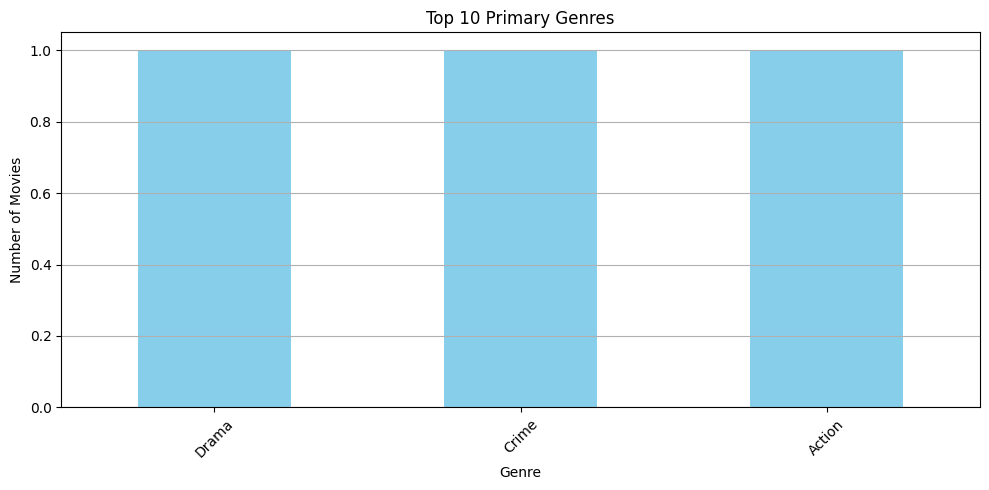

In [26]:
df['Genre_1'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), color='skyblue')

plt.title("Top 10 Primary Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

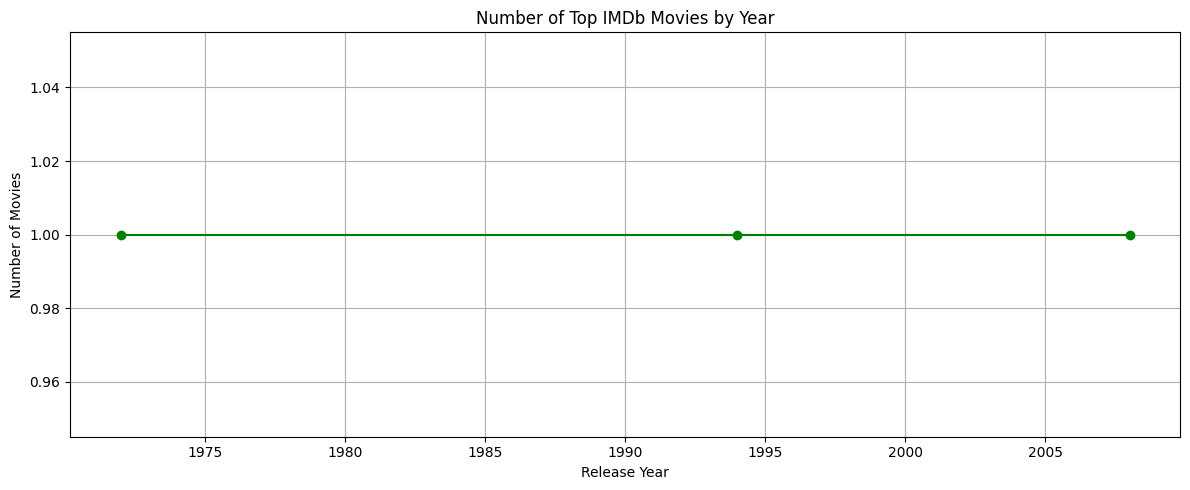

In [27]:
df['Released_Year'].value_counts().sort_index().plot(kind='line', marker='o', figsize=(12, 5), color='green')

plt.title("Number of Top IMDb Movies by Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.grid()
plt.tight_layout()
plt.show()

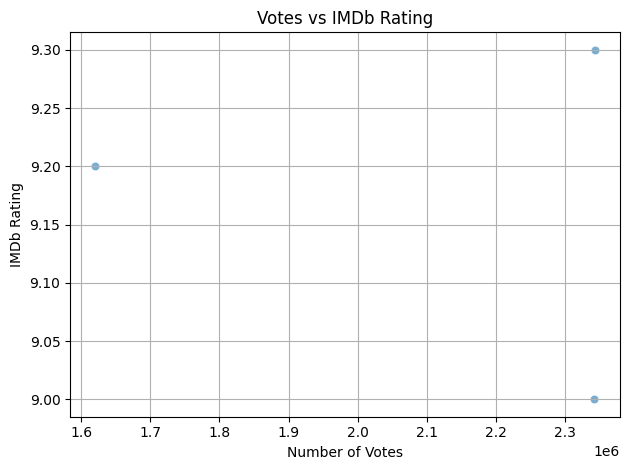

In [28]:
sns.scatterplot(data=df, x='No_of_Votes', y='IMDB_Rating', alpha=0.6)

plt.title("Votes vs IMDb Rating")
plt.xlabel("Number of Votes")
plt.ylabel("IMDb Rating")
plt.grid()
plt.tight_layout()
plt.show()